## How are college types and regions they are located correlated to salaries after graduation?

https://www.kaggle.com/wsj/college-salaries/

### Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
college_df = pd.read_csv('salaries-by-college-type.csv')
region_df = pd.read_csv('salaries-by-region.csv')

In [3]:
# Combining salary by college data and salary by region data into one unified data

college_region_df = college_df.\
merge(region_df.loc[:, ('School Name','Region')], how='left',on='School Name')

college_region_df.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Region
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00",Northeastern
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN,California
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN,California
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00",Northeastern
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN,Northeastern


In [4]:
# There is missing data. Also, some of the data types that are supposed to be "numeric" are currently "objects", so we need to fix them too
college_region_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 0 to 268
Data columns (total 9 columns):
School Name                          269 non-null object
School Type                          269 non-null object
Starting Median Salary               269 non-null object
Mid-Career Median Salary             269 non-null object
Mid-Career 10th Percentile Salary    231 non-null object
Mid-Career 25th Percentile Salary    269 non-null object
Mid-Career 75th Percentile Salary    269 non-null object
Mid-Career 90th Percentile Salary    231 non-null object
Region                               268 non-null object
dtypes: object(9)
memory usage: 21.0+ KB


In [5]:
dollar_sign_cols = ['Starting Median Salary','Mid-Career Median Salary','Mid-Career 10th Percentile Salary',
                    'Mid-Career 25th Percentile Salary','Mid-Career 75th Percentile Salary','Mid-Career 90th Percentile Salary']

for x in dollar_sign_cols:
    college_region_df[x] = college_region_df[x].str.replace("$","")
    college_region_df[x] = college_region_df[x].str.replace(",","")
    college_region_df[x] = pd.to_numeric(college_region_df[x])

In [6]:
# Filling in missing data with column interpolation

college_region_df.interpolate(inplace=True)

In [7]:
college_region_df.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Region
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.000000,99200.0,168000.0,220000.0,Northeastern
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,73466.666667,104000.0,161000.0,210000.0,California
2,Harvey Mudd College,Engineering,71800.0,122000.0,70133.333333,96000.0,180000.0,200000.0,California
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.000000,94300.0,143000.0,190000.0,Northeastern
4,Cooper Union,Engineering,62200.0,114000.0,73400.000000,80200.0,142000.0,185000.0,Northeastern


### Type of Schools

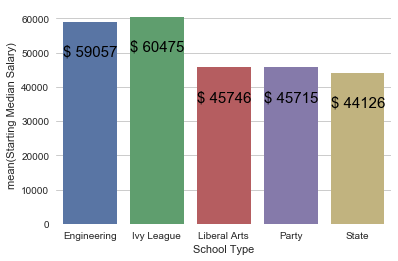

In [53]:
# Average starting median salary of each type of schools

sns.set_style("whitegrid")
bars = sns.barplot(college_region_df.groupby('School Type')['Starting Median Salary'].mean().index, 
            college_region_df.groupby('School Type')['Starting Median Salary'].mean())

# Taking off frame from the graph
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Annotating salaries on each bar
for bar in bars.patches:
    plt.gca().text(bar.get_x() +\
                   bar.get_width()/2, 
                   bar.get_height()-10000, '$ ' + str(int(bar.get_height())), 
                 ha='center', color='black', fontsize=15)

The mean starting median salary is highest for Ivy League Schools, follwed by Engineering schools with not much difference

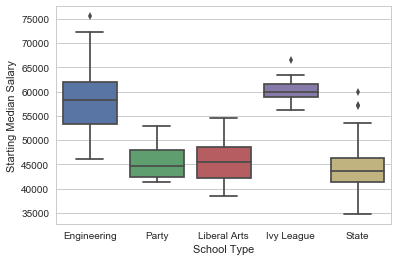

In [47]:
sns.boxplot(x='School Type',y='Starting Median Salary', data=college_region_df)

Although Ivy leagues schools have modestly higher median starting salaries than Engineering schools, their standard deviation of the distribution for starting median salary is way smaller than that of Engineering schools. That being said, students who graduate from Engineering schools receive starting salaries that have wider ranges than those who are from Ivy League schools

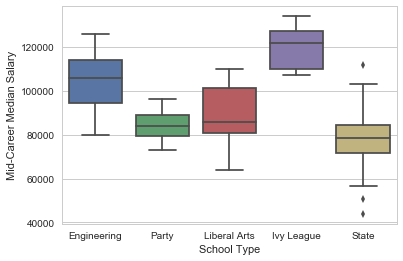

In [51]:
sns.boxplot(x='School Type',y='Mid-Career Median Salary', data=college_region_df)

In people's mid-career, salaries go up overall regardless of the type of colleges. But what's notable is the widened gap in median salaries between Ivy League school alumns and Engineering school alumns. Also, the variability of the distribution between the two types of schools is not that different anymore.

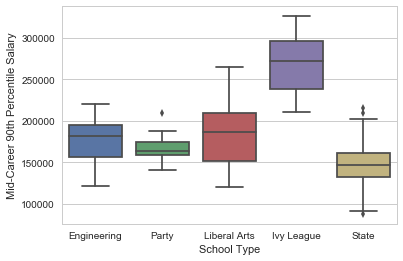

In [52]:
sns.boxplot(x='School Type',y='Mid-Career 90th Percentile Salary', data=college_region_df)

When we look at the top-notch earners in their mid career, we can find out that some alumns from liberal arts colleges even earn as much as the Ivy League alumns who are in the 50% percentile. Moreover, the median mid-career 90th percentile salary for Engineering school alumns is slightly lower than that of Liberal Arts alumns. That being said, the most capable alumns from liberal arts colleges end up getting just as equally competitive salaries as their counterparts in their mid careers.

### Regions of Schools

In [56]:
college_region_df.groupby('Region').count()['School Name']

Region
California      27
Midwestern      64
Northeastern    70
Southern        68
Western         39
Name: School Name, dtype: int64

The Northeast has the most colleges and universites in the States followed by the Midwest and the South

In [57]:
college_region_df.groupby('Region').mean()

,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
Region,,,,,,
California,50155.555556,91633.333333,48410.370370,66096.296296,124844.444444,166217.283951
Midwestern,43801.562500,77637.500000,42024.479167,56301.562500,106775.000000,146764.583333
Northeastern,49267.142857,93518.571429,50059.380952,66601.428571,133350.000000,190441.904762
Southern,44288.235294,80302.941176,42899.509804,57839.705882,110188.235294,152394.607843
Western,44151.282051,78135.897436,41587.948718,56238.461538,106161.538462,142011.111111


In [60]:
mean_by_region_df = college_region_df.groupby('Region').mean()

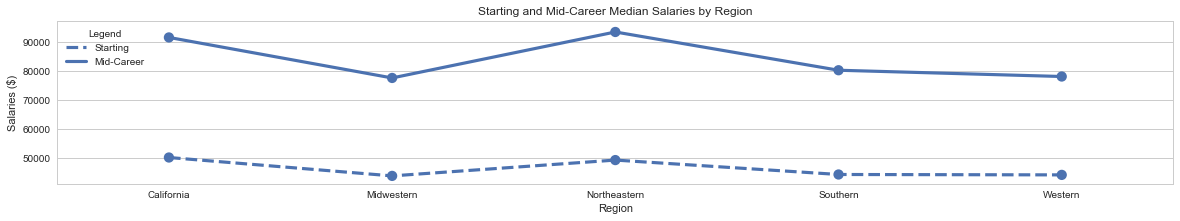

In [90]:
plt.figure(figsize=(20,3))
sns.pointplot(mean_by_region_df.index, mean_by_region_df['Starting Median Salary'], linestyles=['--'])
sns.pointplot(mean_by_region_df.index, mean_by_region_df['Mid-Career Median Salary'])

plt.ylabel('Salaries ($)')
plt.legend(['Starting','Mid-Career'], loc=2, title='Legend')
plt.title('Starting and Mid-Career Median Salaries by Region')

The two regions with highest starting median salaries are Calfornia and the Northeast. California is slightly higher than the Northeast at first, but the Northeast surpasses California in the mid-career stage. Also, the salary disparity between Northeast+California and other regions becomes larger in the mid-career stage.

In [112]:
college_region_df.groupby('Region')['Starting Median Salary', 'Mid-Career Median Salary'].max()

,Starting Median Salary,Mid-Career Median Salary
Region,,
California,75500.0,123000.0
Midwestern,57100.0,103000.0
Northeastern,72200.0,134000.0
Southern,58300.0,106000.0
Western,58100.0,106000.0


In [119]:
region_max_salary_df = college_region_df.groupby('Region')['Starting Median Salary', 'Mid-Career Median Salary'].max()

In [144]:
regions = ['California', 'Midwestern','Northeastern','Southern','Western']
starting_max_vals = region_max_salary_df['Starting Median Salary'].values
midcar_max_vals = region_max_salary_df['Mid-Career Median Salary'].values

In [195]:
# Schools with max starting median salary by region 

max_starting_salary_schools_by_region = []

for i, region in enumerate(regions):
    
    lst = college_region_df.loc[college_region_df.Region==region]\
    [college_region_df.loc[college_region_df.Region==region]['Starting Median Salary']==starting_max_vals[i]]\
    [['School Name','Starting Median Salary', 'Region']]
    
    max_starting_salary_schools_by_region.append(lst)
    
pd.concat(max_starting_salary_schools_by_region).reset_index().drop(['index'],axis=1)

,School Name,Starting Median Salary,Region
0,California Institute of Technology (CIT),75500.0,California
1,University of Missouri - Rolla (UMR),57100.0,Midwestern
2,Massachusetts Institute of Technology (MIT),72200.0,Northeastern
3,Georgia Institute of Technology,58300.0,Southern
4,Colorado School of Mines,58100.0,Western


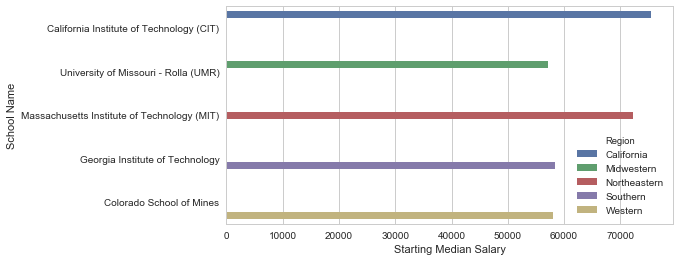

In [207]:
max_starting_salary_schools_by_region_df = pd.concat(max_starting_salary_schools_by_region).reset_index().drop(['index'],axis=1)

plt.figure(figsize=(8,4))
sns.barplot(max_starting_salary_schools_by_region_df['Starting Median Salary'], 
                   max_starting_salary_schools_by_region_df['School Name'], orient='h',
                    hue=max_starting_salary_schools_by_region_df['Region'])

plt.xlabel('Starting Median Salary')

In [209]:
# Schools with max Mid-Career median salary by region 

max_midcar_salary_schools_by_region = []

for i, region in enumerate(regions):
    
    lst2 = college_region_df.loc[college_region_df.Region==region]\
    [college_region_df.loc[college_region_df.Region==region]['Mid-Career Median Salary']==midcar_max_vals[i]]\
    [['School Name','Mid-Career Median Salary', 'Region']]
    
    max_midcar_salary_schools_by_region.append(lst2)
    
pd.concat(max_midcar_salary_schools_by_region).reset_index().drop(['index'],axis=1)

,School Name,Mid-Career Median Salary,Region
0,California Institute of Technology (CIT),123000.0,California
1,Carleton College,103000.0,Midwestern
2,Dartmouth College,134000.0,Northeastern
3,Georgia Institute of Technology,106000.0,Southern
4,Colorado School of Mines,106000.0,Western


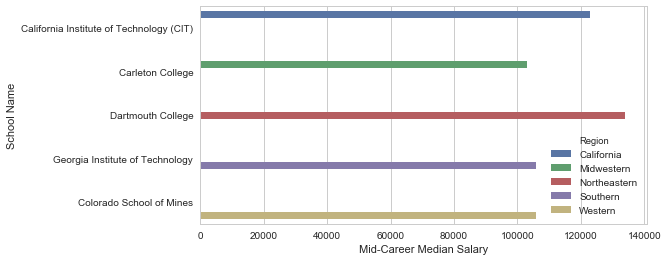

In [210]:
max_midcar_salary_schools_by_region_df = pd.concat(max_midcar_salary_schools_by_region).reset_index().drop(['index'],axis=1)

plt.figure(figsize=(8,4))
sns.barplot(max_midcar_salary_schools_by_region_df['Mid-Career Median Salary'], 
                   max_midcar_salary_schools_by_region_df['School Name'], orient='h',
           hue=max_midcar_salary_schools_by_region_df['Region'])

plt.xlabel('Mid-Career Median Salary')